In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

1. Explain in your Notebook using „markdown“ why the elbow method does not
work properly.

Elbow method doesn't work properly. The Kmeans.inertia takes into account only about the Mean Squared errors from samples to ther cluster centers. It doesn't give a measure of how separated the clusters are from each other or what is the extent of overlap between the clusters. At the elbow there is an arbitrary choice to choose n_clusters = 2 or 3. 
Without pre-requisite knowledge we cannot infer much from the elbow method as it just takes the features provided by data it into account which might not represent all the information needed to actually obtain a true measure of clustering.


2. Explain why the clustering algorithm has „difficulties“ with the data set. Why
does it distinguish only two species instead of three?

KNN can land into sub optimum and works well with spherical clusters since it computes distances (usually Euclidean) between cluster centers and sample points. The algorithm also has a maximum number of iterations which it cannot exceed, it is possible that the algorithm doesn't converge before the maximum number of iterations are done with.
Also the hyperparamter 'tol' i.e. relative tolerance with regards to inertia to declare convergence also determines how well the algorithm is able to cluster. 

The algorithm distinguishes only two species instead of three because there are two species of Iris which have very similar features (petal length etc.) and in the feature space the samples are not too far apart, so according to the minimal distances, they tend to collapse into one cluster.

3. Use one imputation method we have done so far in this class and compare it to
using the raw data. Does imputation improve the result?

Using the raw data the false positive and false negative rate is higher than using the simple imputer. For the irative imputer the False Positive and False negative rate is quite lower so imputation does imporve the result but not always and has to be done carefully. This is shown in diabetes_impute.ipynb and heart_impute.ipynb


In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = iris.drop(['Id','Species'], axis = 1)
X = X.values


In [5]:
wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 22)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

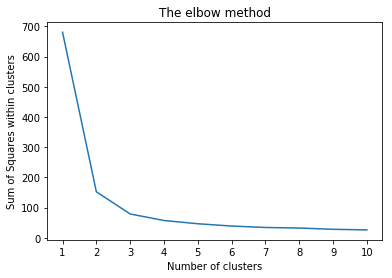

In [6]:
plt.plot (range(1,11), wcss)
plt.xticks(range(1,11))
plt.title ('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares within clusters')
plt.show()

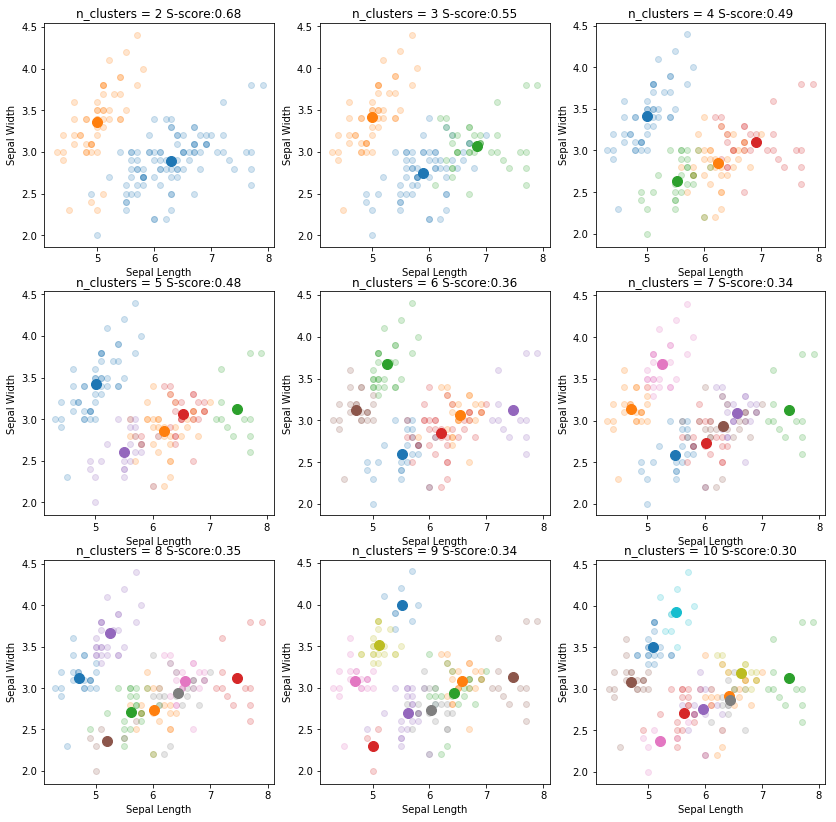

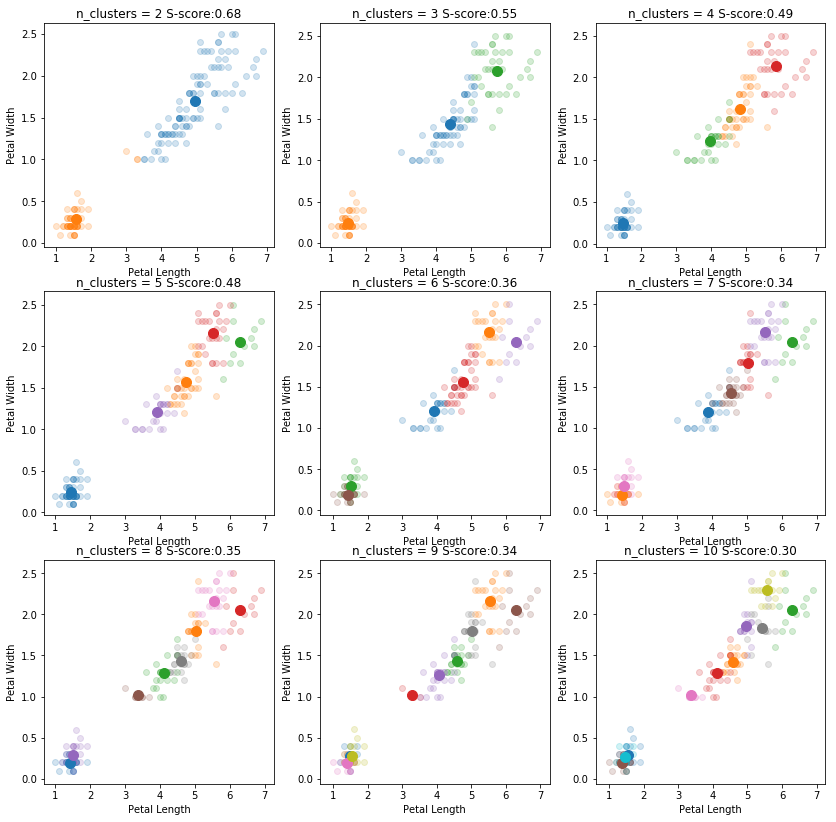

In [7]:
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,11))
fig, axs = plt.subplots(3,3, figsize = (14,14))
axs = axs.ravel()
fig2, axs2 = plt.subplots(3,3, figsize = (14,14))
axs2 = axs2.ravel()

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X) #predict cluster centroids
    score = silhouette_score (X, preds, metric='euclidean')
    centers = clusterer.cluster_centers_ #cluster centers
    for i in range(n_clusters): 
        #print (i)
        axs[n_clusters-2].scatter(X[preds==i,0], X[preds==i,1], alpha = 0.20)
        axs[n_clusters-2].plot(centers[i][0], centers[i][1], marker='o', markersize = 10)
        axs2[n_clusters-2].scatter(X[preds==i,2], X[preds==i,3], alpha = 0.20)
        axs2[n_clusters-2].plot(centers[i][2], centers[i][3], marker='o', markersize = 10)
    
    axs[n_clusters-2].set_xlabel('Sepal Length')
    axs[n_clusters-2].set_ylabel('Sepal Width')
    axs[n_clusters-2].set_title('n_clusters = ' + str(n_clusters)+ ' S-score:' +'{:.4}'.format(str(score)))
    axs2[n_clusters-2].set_xlabel('Petal Length')
    axs2[n_clusters-2].set_ylabel('Petal Width')
    axs2[n_clusters-2].set_title('n_clusters = ' + str(n_clusters)+ ' S-score:' +'{:.4}'.format(str(score)))
    
    #print ("For n_clusters = {}, the silhouette score is {:.2f}".format(n_clusters, score))

In [8]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/iris.csv")

data = [
    go.Parcoords(
        line = dict(), 
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = df['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = df['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = df['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = df['petal_width'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

/Users/shreyakapoor/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [9]:
len(centers)

10

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 2)
X_p = pca.fit_transform(X)

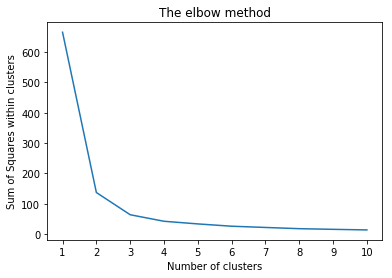

In [12]:
wcss = []
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 22)
    kmeans.fit(X_p)
    wcss.append(kmeans.inertia_)
    
plt.plot (range(1,11), wcss)
plt.xticks(range(1,11))
plt.title ('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares within clusters')
plt.show()

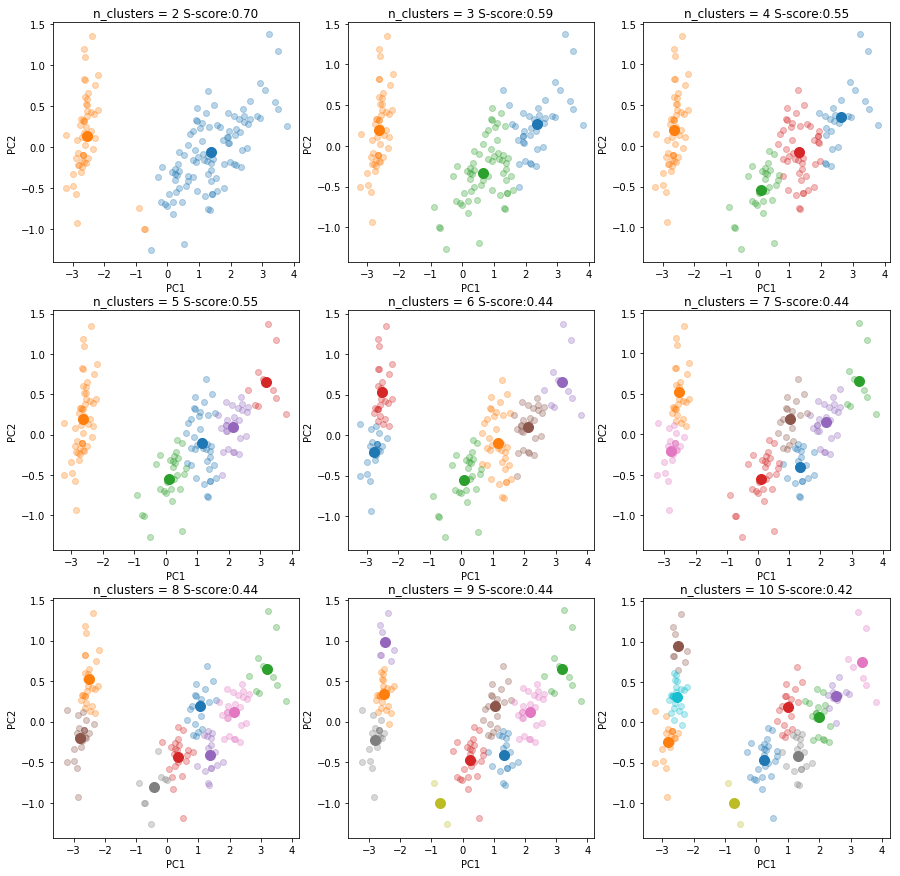

In [13]:
fig2, axs = plt.subplots(3,3, figsize = (15,15))
axs = axs.ravel()
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_p) #predict cluster centroids
    score = silhouette_score (X_p, preds, metric='euclidean')
    centers = clusterer.cluster_centers_ #cluster centers
    for i in range(n_clusters): 
        axs[n_clusters-2].scatter(X_p[preds==i,0], X_p[preds==i,1], alpha = 0.30)
        axs[n_clusters-2].plot(centers[i][0], centers[i][1], marker='o', markersize = 10)
        
    axs[n_clusters-2].set_xlabel('PC1')
    axs[n_clusters-2].set_ylabel('PC2')
    axs[n_clusters-2].set_title('n_clusters = ' + str(n_clusters)+ ' S-score:' +'{:.4}'.format(str(score)))

cluster_centers_ : array, [n_clusters, n_features] <br> 
    Coordinates of cluster centers. If the algorithm stops before fully <br> 
    converging (see ``tol`` and ``max_iter``), these will not be <br> 
    consistent with ``labels_` <br> 